In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from scipy import stats

**FIRST OF ALL WE USE CORR COMMAND TO FIND POSSIBLE RELATIONS FOR ONR MODEL**

In [2]:
df = pd.read_csv("cars analysis.csv")

In [3]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-l/100km,diesel type_fuel,gas type_fuel
Unnamed: 0,1.000000,-0.151621,-0.238306,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260077,-0.160844,0.150276,-0.013316,-0.203775,0.015940,0.011255,-0.116555,-0.072955,0.125568,-0.125568
symboling,-0.151621,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071389,0.274573,-0.035823,0.034606,-0.082201,-0.030190,-0.194311,0.194311
normalized-losses,-0.238306,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999,0.178527,-0.101437,0.101437
wheel-base,0.129729,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.361052,-0.470414,-0.544082,0.583168,0.578128,0.308346,-0.308346
length,0.170636,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287325,-0.670909,-0.704662,0.682986,0.711597,0.212679,-0.212679
width,0.052387,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219957,-0.642704,-0.677218,0.728699,0.728044,0.233880,-0.233880
height,0.255960,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.322272,-0.048640,-0.107358,0.134388,0.085892,0.284631,-0.284631
curb-weight,0.071962,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266306,-0.757414,-0.797465,0.820825,0.836742,0.217275,-0.217275
engine-size,-0.033930,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244618,-0.653658,-0.677470,0.861752,0.777077,0.069594,-0.069594
bore,0.260077,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.255053,-0.584508,-0.586992,0.532300,0.551943,0.054457,-0.054457


**now we are goig to do descriptive statistical analysis for continous variable**

In [4]:
df[["price","highway-l/100km"]].corr()

,price,highway-l/100km
price,1.000000,0.789346
highway-l/100km,0.789346,1.000000


<AxesSubplot:xlabel='highway-l/100km', ylabel='price'>

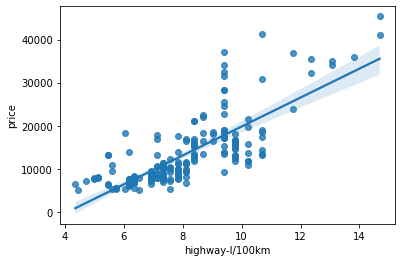

In [5]:
sns.regplot(x='highway-l/100km',y = "price",data = df)

**as you can see from above graph it has a positive relation with price so we can use it for our model**

In [6]:
df[["price","horsepower"]].corr()

,price,horsepower
price,1.000000,0.757917
horsepower,0.757917,1.000000


<AxesSubplot:xlabel='horsepower', ylabel='price'>

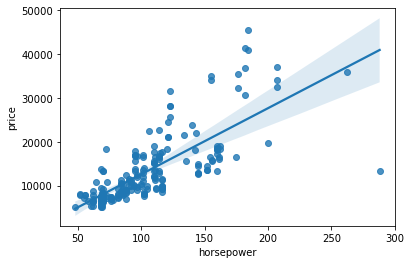

In [7]:
sns.regplot(x = "horsepower", y = "price",data = df)

In [8]:
df[["compression-ratio","price"]].corr()

,compression-ratio,price
compression-ratio,1.00000,0.07099
price,0.07099,1.00000


<AxesSubplot:xlabel='compression-ratio', ylabel='price'>

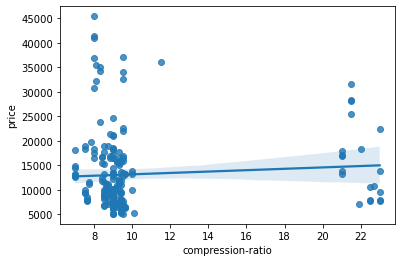

In [9]:
sns.regplot(x ="compression-ratio",y = "price", data=df )

**from the above paragraph the line is straight so we cant use this realtion for model**

**now we are going to do descriptive statistical analysis for categorical variables**

<AxesSubplot:xlabel='engine-location', ylabel='price'>

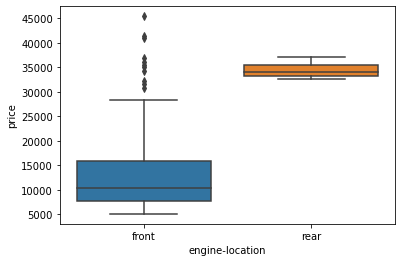

In [10]:
sns.boxplot(x = "engine-location",y = "price",data = df)

In [11]:
df["engine-location"].value_counts().to_frame()

,engine-location
front,202
rear,3


In [12]:
a = df["body-style"].value_counts().to_frame()
a.rename(columns={"body-style": "conts_values"})
a.index.name = "body-style"

In [13]:
a

,body-style
body-style,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


**Now grouping is used to make relation between categorical values**

In [14]:
group = df[["body-style","engine-location","price"]]

In [15]:
group = group.groupby(["body-style","engine-location"],as_index = False)
group.head(10)

,body-style,engine-location,price
0,convertible,front,13495.000000
1,convertible,front,16500.000000
2,hatchback,front,16500.000000
3,sedan,front,13950.000000
4,sedan,front,17450.000000
5,sedan,front,15250.000000
6,sedan,front,17710.000000
7,wagon,front,18920.000000
8,sedan,front,23875.000000
9,hatchback,front,13207.129353


In [ ]:
pivot.fillna(0)

**correlation the relation between cause and effect between two variabls**

In [ ]:
person_coef,p_values = stats.pearsonr(df["price"],df["horsepower"])
print(person_coef,p_values)

In [ ]:
df.head(1)